In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

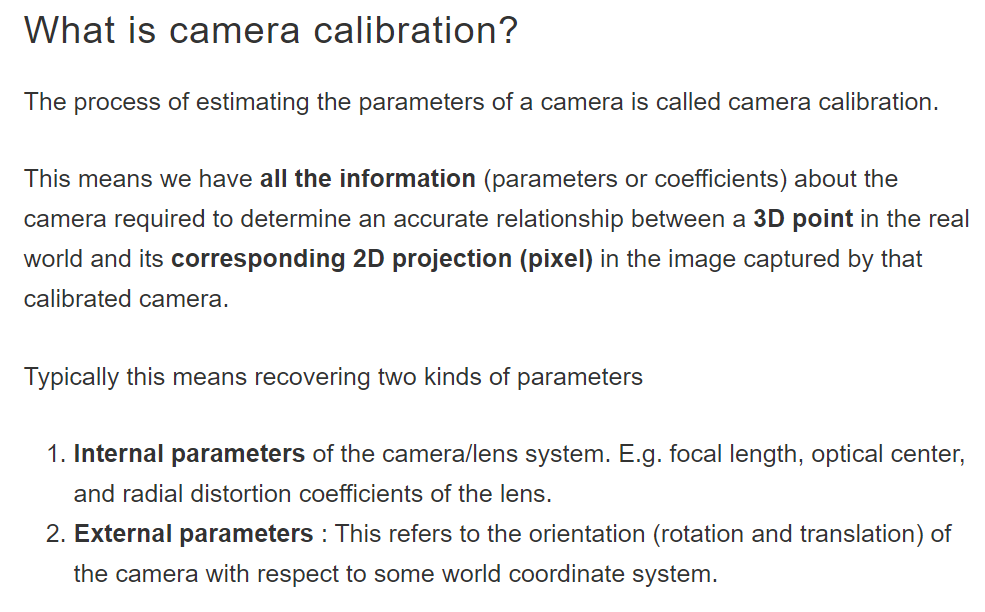

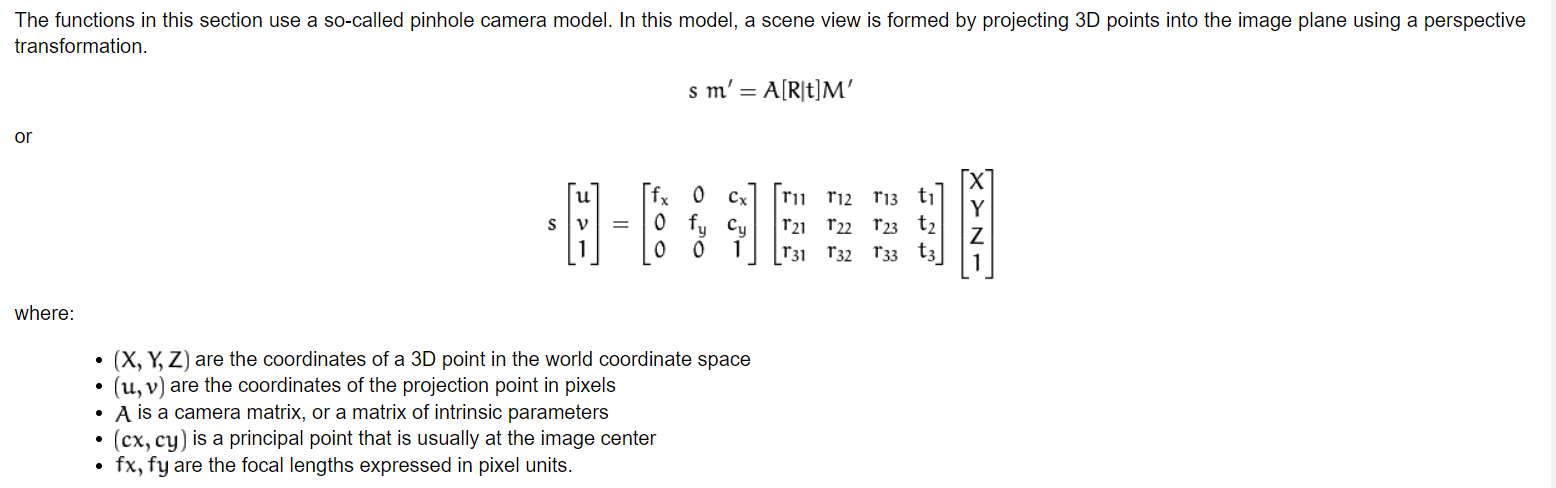

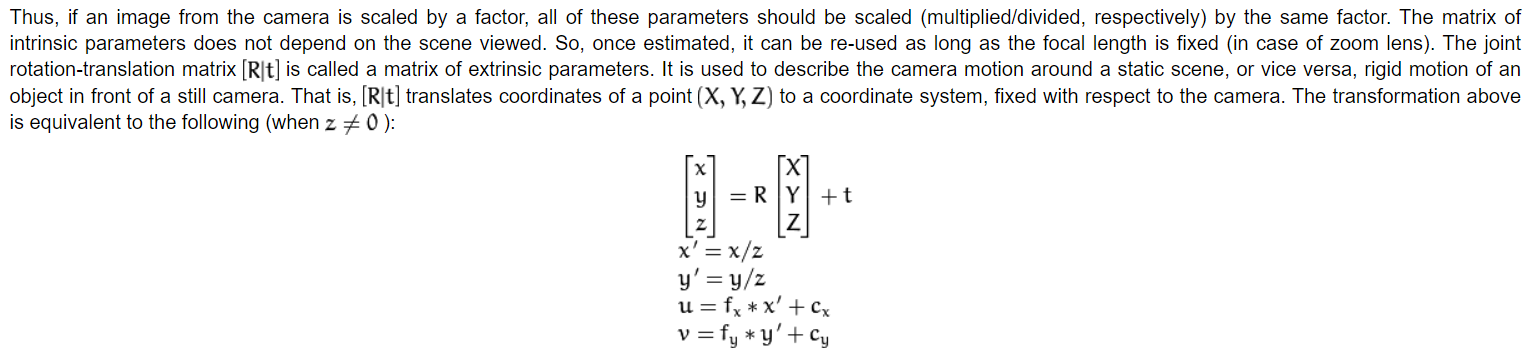

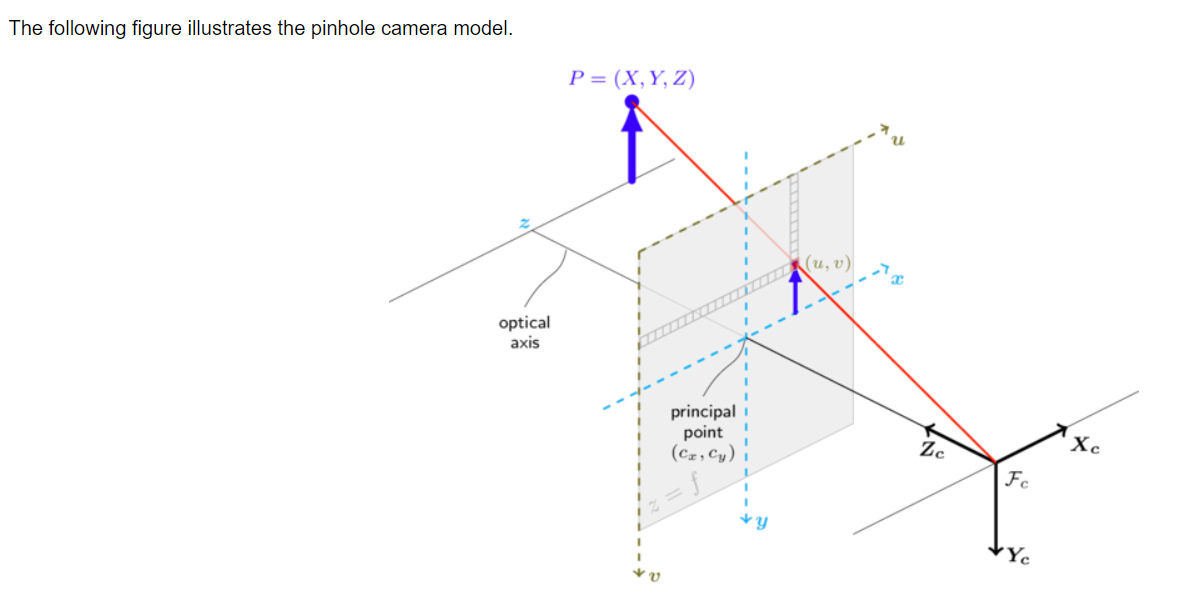

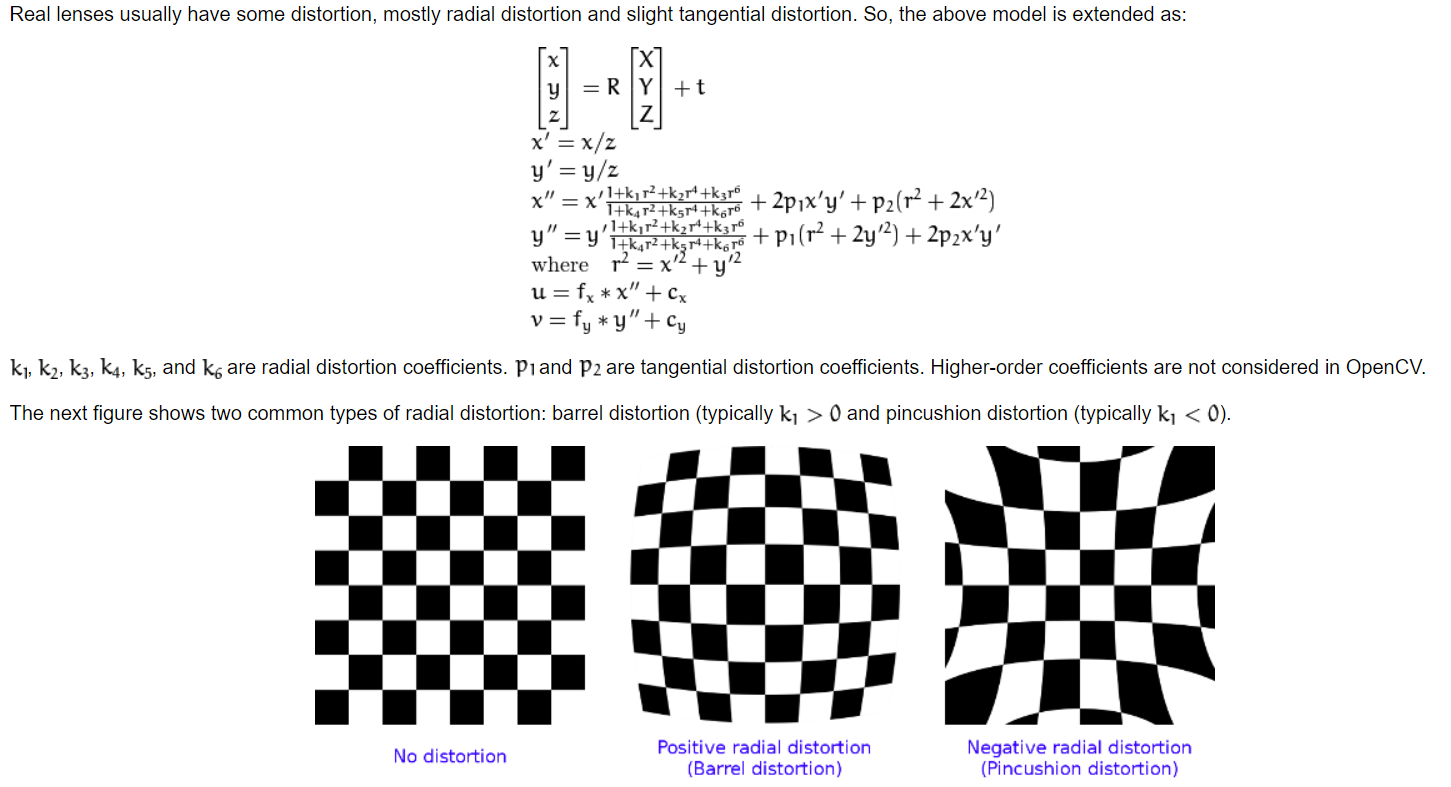

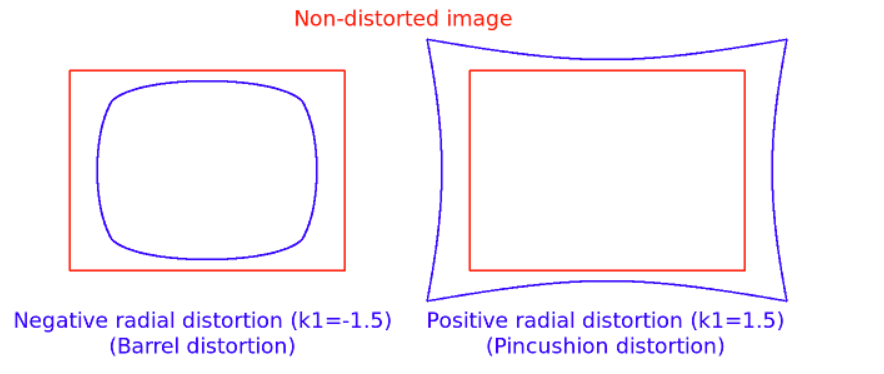

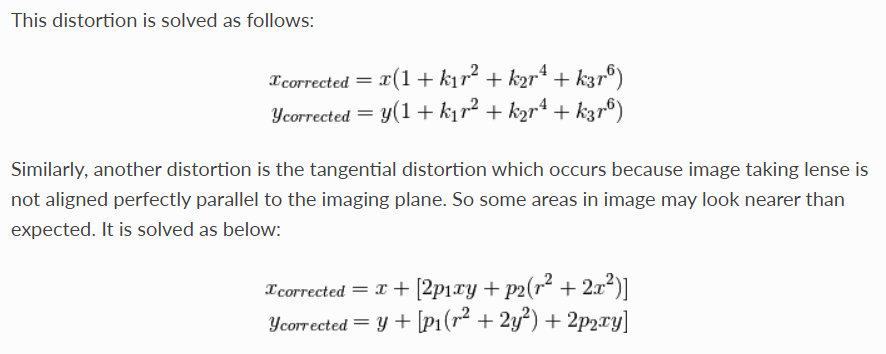

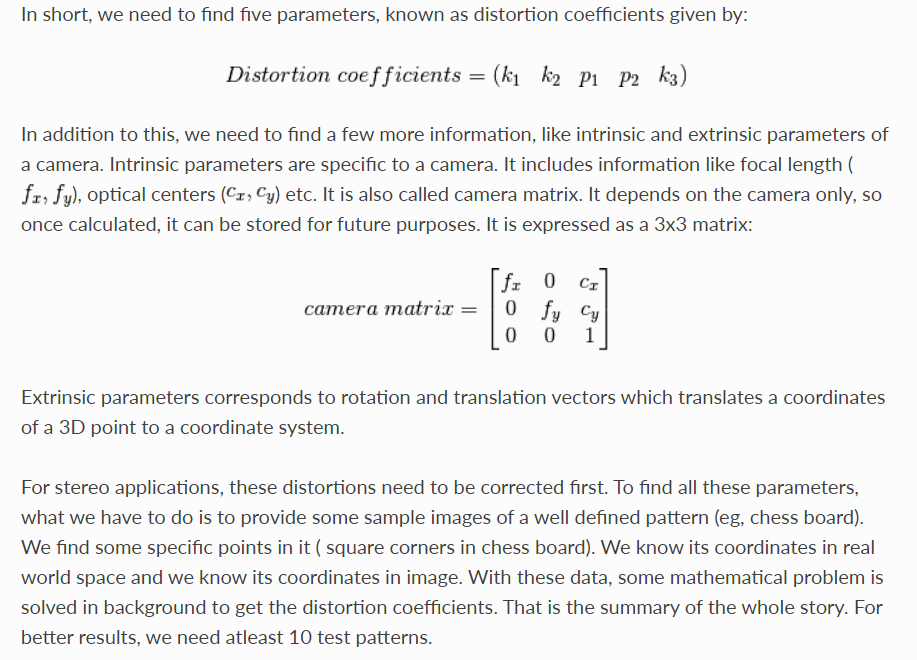

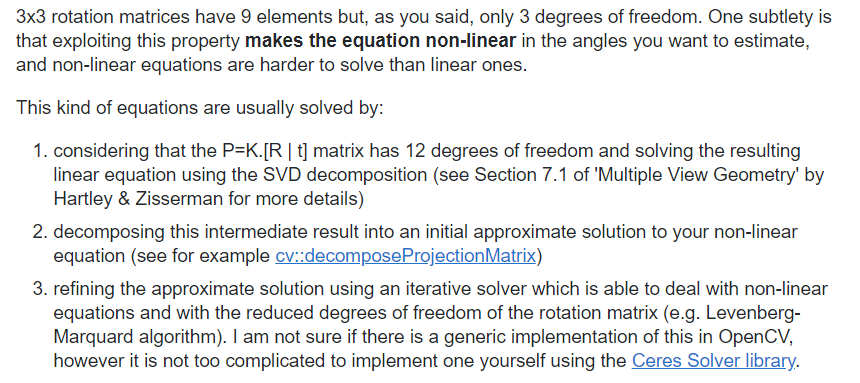

In [8]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2) #multiply with 20 (20 mm of actual each gridsize for the image I used)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob(r'C:\Users\khan1\Desktop\Projective_transform\camera_calibration\calib_img_blue\*.jpg')

# path = 'results'
# pathlib.Path(path).mkdir(parents=True, exist_ok=True) 

(720, 1280, 3)


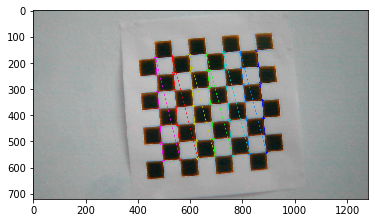

(720, 1280, 3)


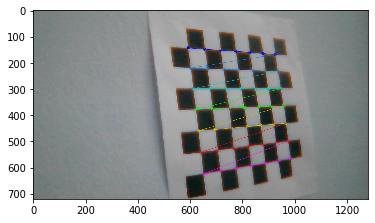

(720, 1280, 3)


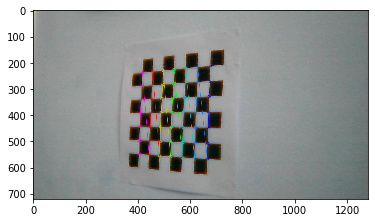

(720, 1280, 3)


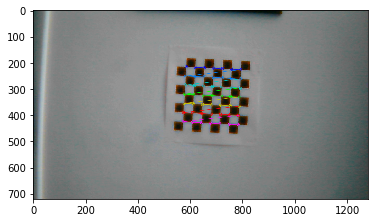

(720, 1280, 3)


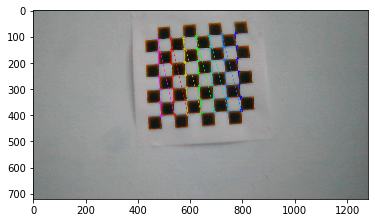

Number of images used for calibration:  5


In [14]:
found = 0
for fname in images:  # Here, 10 can be changed to whatever number you like to choose
    img = cv2.imread(fname) # Capture frame-by-frame
    print(img.shape)
    #print(images[im_i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)   # Certainly, every loop objp is the same, in 3D.
        corners2 = cv2.cornerSubPix(gray,corners,(15,15),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        found += 1
        plt.imshow(img)
        plt.show()
        
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
        # if you want to save images with detected corners 
        # uncomment following 2 lines and lines 5, 18 and 19
        # image_name = path + '/calibresult' + str(found) + '.png'
        # cv2.imwrite(image_name, img)

print("Number of images used for calibration: ", found)


In [10]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)

print("distorsion coeff : \n")
print(dist)

for rvec in rvecs:
    R_matrix, _ = cv2.Rodrigues(rvec)
    print("rotation matrix (for each image): \n")
    print(R_matrix)
    
print("rotation vector : \n")
print(rvecs)

# print("rotation matrix : \n")
# print(R_matrix)

print("translation vector : \n")
print(tvecs)

#concatenate the [R t]
count = 0
for rvec in rvecs:
    R_matrix, _ = cv2.Rodrigues(rvec)
    Rt_matrix = np.concatenate((R_matrix, tvecs[count]), axis=1)
    count = count + 1
    print("[R t] matrix (for each img): \n")
    print(Rt_matrix)



Camera matrix : 

[[1.47270405e+03 0.00000000e+00 6.17714972e+02]
 [0.00000000e+00 1.47040042e+03 3.91984765e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distorsion coeff : 

[[-3.84295368e-01  1.64604435e+00  2.64276605e-03 -2.30051683e-03
  -1.19229168e+01]]
rotation matrix (for each image): 

[[ 0.07988045 -0.99638566  0.02889177]
 [ 0.99476745  0.08153574  0.06155999]
 [-0.06369321  0.02382315  0.99768514]]
rotation matrix (for each image): 

[[ 0.82847002  0.12149135 -0.5466967 ]
 [-0.04219542  0.98695238  0.15538514]
 [ 0.55844156 -0.10566384  0.82278683]]
rotation matrix (for each image): 

[[-0.03634459 -0.81353217  0.58038304]
 [ 0.99691731  0.01089426  0.07769933]
 [-0.06953375  0.58141785  0.81062836]]
rotation matrix (for each image): 

[[ 0.99786153 -0.05312336  0.03808242]
 [ 0.0527349   0.99854647  0.0111341 ]
 [-0.03861854 -0.00910201  0.99921257]]
rotation matrix (for each image): 

[[ 0.05752658 -0.99665967  0.05796717]
 [ 0.98948931  0.06463626  0.12935634]


In [11]:
# Re-projection Error
# Re-projection error gives a good estimation of just how exact is the 
# found parameters. This should be as close to zero as possible. Given 
# the intrinsic, distortion, rotation and translation matrices, we first
# transform the object point to image point using cv2.projectPoints(). 
# Then we calculate the absolute norm between what we got with our transformation
# and the corner finding algorithm. To find the average error we calculate the 
# arithmetical mean of the errors calculate for all the calibration images.

mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print("total error: ", mean_error/len(objpoints))

total error:  0.05726042123130679


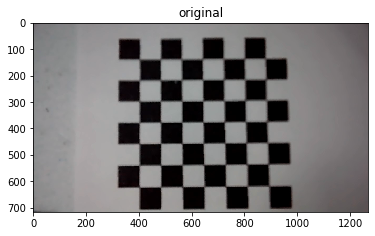

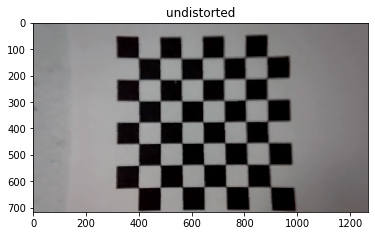

In [12]:
#### Undistort ####

img = cv2.imread(r"C:\Users\khan1\Desktop\Projective_transform\camera_calibration\chk_img_2.jpg")
plt.imshow(img)
plt.title("original")
plt.show()
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
# x,y,w,h = roi
# dst = dst[y:y+h, x:x+w]
plt.imshow(dst)
plt.title("undistorted")
plt.show()


f_x, f_y, c_x, c_y in pixel value

converting into mm:

Fx = fx * W/w

Fx = focal length in mm W = sensor width in mm w = image width in pixels fx = focal length in pixels

The size of my images: 1280 x 720 (width x height)

## Red Camera
Camera matrix : 

[[1.65960674e+03 0.00000000e+00 6.73312308e+02]\
 [0.00000000e+00 1.65424348e+03 4.06097542e+02]\
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 
 
distorsion coeff : 

[[ 1.70866217e-02  2.37819278e+00 -3.78156023e-03  9.66626009e-04 -1.96598115e+01]]


## Blue Camera
Camera matrix : 

[[1.47383361e+03 0.00000000e+00 6.21050156e+02]\
 [0.00000000e+00 1.47162083e+03 3.98028930e+02]\
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 
 
distorsion coeff : 

[[-4.09392521e-01  2.33899016e+00  3.19112060e-03 -2.90209779e-03 -1.66966131e+01]]